# **Importing Required Libraries**

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Loading the dataset**

Inorder to get the `dataset_info` you have set its value to true

In [2]:
dataset, dataset_info = tfds.load('malaria',with_info=True,as_supervised=True,split=['train'],shuffle_files=True)

# **Explaining the test,train and validation split**

In [3]:
# import tensorflow as tf

# TRAIN_RATIO = 0.6
# VAL_RATIO = 0.2
# TEST_RATIO = 0.2

# dataset = tf.data.Dataset.range(10)
# print("Full dataset:", list(dataset.as_numpy_iterator()))

# # Calculate dataset sizes
# dataset_size = 10  # As we have 10 elements in the dataset
# train_size = int(TRAIN_RATIO * dataset_size)
# val_size = int(VAL_RATIO * dataset_size)
# test_size = dataset_size - train_size - val_size

# # Split the dataset
# train_dataset = dataset.take(train_size)
# val_test_dataset = dataset.skip(train_size)
# val_dataset = val_test_dataset.take(val_size)
# test_dataset = val_test_dataset.skip(val_size)

# print("Train dataset:", list(train_dataset.as_numpy_iterator()))
# print("Validation dataset:", list(val_dataset.as_numpy_iterator()))
# print("Test dataset:", list(test_dataset.as_numpy_iterator()))


# **Writing Function to train, test, and val split the dataset**

In [4]:
def splits(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
    dataset_size = len(dataset)
    train_size = int(TRAIN_RATIO * dataset_size)
    val_size = int(VAL_RATIO * dataset_size)
    test_size = dataset_size - train_size - val_size

    train_dataset = dataset.take(train_size)
    val_test_dataset = dataset.skip(train_size)
    val_dataset = val_test_dataset.take(val_size)
    test_dataset = val_test_dataset.skip(val_size)

    return train_dataset,val_dataset,test_dataset

In [5]:
TRAIN_RATIO=0.8
VAL_RATIO=0.1
TEST_RATIO=0.1

train_dataset,val_dataset,test_dataset = splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
print(train_dataset,val_dataset,test_dataset)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))> <_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))> <_SkipDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


# **Data Visualization**

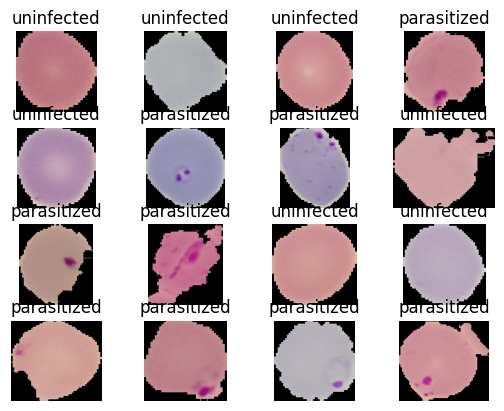

In [6]:
for i,(image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis("off")

In [7]:
print('Label "0" represents: ',dataset_info.features['label'].int2str(0))
print('Label "1" represents: ',dataset_info.features['label'].int2str(1))

Label "0" represents:  parasitized
Label "1" represents:  uninfected


# **Data Preprocessing**

In [8]:
IM_SIZE = 224
def resizing_rescale_image(image, label):
  return tf.image.resize(image,(IM_SIZE,IM_SIZE))/255.0,label

In [9]:
train_dataset = train_dataset.map(resizing_rescale_image)
val_dataset = val_dataset.map(resizing_rescale_image)
test_dataset = test_dataset.map(resizing_rescale_image)

In [10]:
for image,label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


In [11]:
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [12]:
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)


***Left Video at 7:56:00***

In [13]:
import tensorflow as tf

# List all physical devices
physical_devices = tf.config.list_physical_devices('GPU')

# Check if GPU is available
if physical_devices:
    print(f"GPUs are available: {physical_devices}")
else:
    print("No GPUs found.")


GPUs are available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [14]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,InputLayer,BatchNormalization

In [15]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

    Conv2D(filters=6, kernel_size=3,strides=1,padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),

    Conv2D(filters=16, kernel_size=3,strides=1,padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),

    Flatten(),

    Dense(100,activation='relu'),
    BatchNormalization(),

    Dense(10,activation='relu'),
    BatchNormalization(),

    Dense(1,activation='sigmoid'),
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

# **Binary Cross Entropy**

In [16]:
from tensorflow.keras.losses import BinaryCrossentropy,Huber,MeanAbsoluteError
from tensorflow.keras.optimizers import Adam

In [17]:
model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy')

In [18]:
history = model.fit(train_dataset,epochs=20,verbose=1)
# history = model.fit(train_dataset, validation_data=val_dataset,epochs=100,verbose=1)

Epoch 1/20
689/689 [==============================] - 48s 51ms/step - loss: 0.6366 - accuracy: 0.6473
Epoch 2/20
689/689 [==============================] - 29s 42ms/step - loss: 0.5253 - accuracy: 0.7357
Epoch 3/20
689/689 [==============================] - 33s 48ms/step - loss: 0.2512 - accuracy: 0.9201
Epoch 4/20
689/689 [==============================] - 30s 43ms/step - loss: 0.2317 - accuracy: 0.9291
Epoch 5/20
689/689 [==============================] - 30s 43ms/step - loss: 0.2005 - accuracy: 0.9361
Epoch 6/20
689/689 [==============================] - 29s 42ms/step - loss: 0.1879 - accuracy: 0.9416
Epoch 7/20
689/689 [==============================] - 32s 46ms/step - loss: 0.2035 - accuracy: 0.9377
Epoch 8/20
689/689 [==============================] - 30s 44ms/step - loss: 0.1785 - accuracy: 0.9451
Epoch 9/20
689/689 [==============================] - 31s 44ms/step - loss: 0.1740 - accuracy: 0.9461
Epoch 10/20
689/689 [==============================] - 29s 43ms/step - loss: 0.169

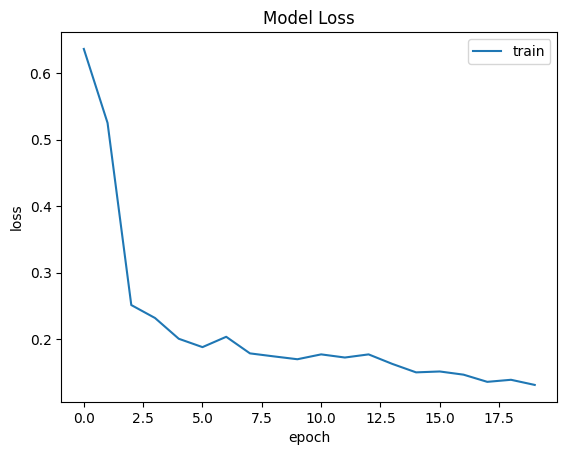

In [21]:
plt.plot(history.history['loss'])
# plt.plot(hitory.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

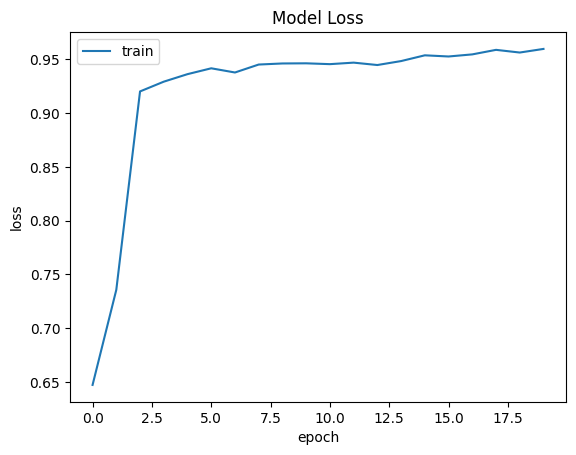

In [22]:
plt.plot(history.history['accuracy'])
# plt.plot(hitory.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# **Model Evaluation and Testing**

In [24]:
model.evaluate(test_dataset)

87/87 [==============================] - 16s 56ms/step - loss: 0.1976 - accuracy: 0.9394


[0.19764579832553864, 0.9394268989562988]

# **Predict**

In [26]:
para_or_not = model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 14s 14s/step


In [27]:
def para_or_not_func(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

1/1 [==============================] - 0s 25ms/step


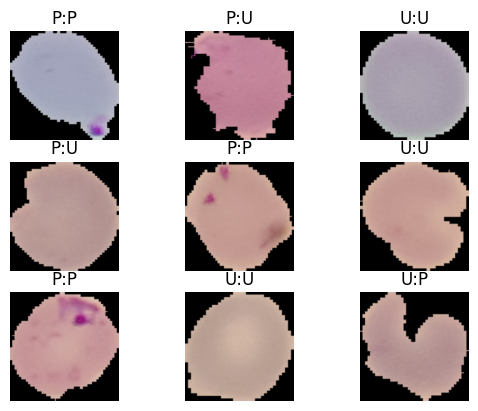

In [28]:
for i, (image,label) in enumerate(test_dataset.take(9)):

  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(para_or_not_func(label.numpy()[0]))+':'+ str(para_or_not_func(model.predict(image)[0][0])))

  plt.axis('off')